## Opening up ROOT file with extracted calorimeter features.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
dataDir = "../Data/h5/"
dataFiles = ["EleEscan_8_95_flatNtuple.h5"]

In [3]:
dataFile = h5py.File(dataDir + dataFiles[0], "r")
dataFile['flatNtuple'].attrs.items()

[(u'CLASS', 'TABLE'),
 (u'VERSION', '2.7'),
 (u'TITLE', 'flatNtuple'),
 (u'NROWS', 100),
 (u'FIELD_0_NAME', 'gunpx'),
 (u'FIELD_1_NAME', 'gunpy'),
 (u'FIELD_2_NAME', 'gunpz'),
 (u'FIELD_3_NAME', 'm'),
 (u'FIELD_4_NAME', 'gunE'),
 (u'FIELD_5_NAME', 'pdgID'),
 (u'FIELD_6_NAME', 'nhcalhits'),
 (u'FIELD_7_NAME', 'necalhits'),
 (u'FIELD_8_NAME', 'hcaltote'),
 (u'FIELD_9_NAME', 'ecaltote'),
 (u'FIELD_0_FILL', 0.0),
 (u'FIELD_1_FILL', 0.0),
 (u'FIELD_2_FILL', 0.0),
 (u'FIELD_3_FILL', 0.0),
 (u'FIELD_4_FILL', 0.0),
 (u'FIELD_5_FILL', 0),
 (u'FIELD_6_FILL', 0),
 (u'FIELD_7_FILL', 0),
 (u'FIELD_8_FILL', 0.0),
 (u'FIELD_9_FILL', 0.0),
 (u'FLAVOR', 'numpy')]

## Not many features right now, so a BDT is not very useful, but this is a proof of concept.

In [4]:
data = {}
features = ['gunpx', 'gunpy', 'gunpz', 'm', 'gunE', 'pdgID', 'nhcalhits', 'necalhits', 'hcaltote', 'ecaltote']
for count, feature in enumerate(features):
    data[feature] = [event[count] for event in dataFile['flatNtuple']];

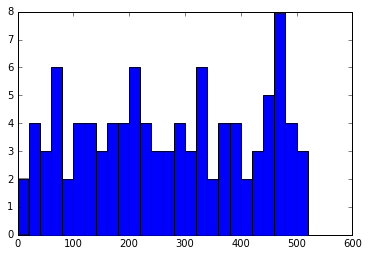

In [14]:
plt.hist(data['gunpx'], range=[0,600], bins=30);

0 out of 100 non-zero elements in gunpy


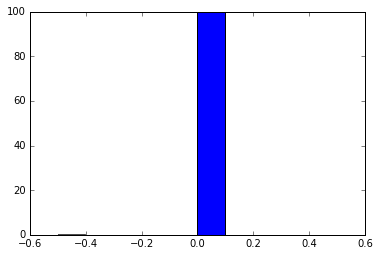

In [39]:
plt.hist(data['gunpy']);
print len([dataPoint for dataPoint in data['gunpy'] if dataPoint != 0]), "out of", len(data['gunpy']), "non-zero elements in gunpy"

0 out of 100 non-zero elements in gunpz


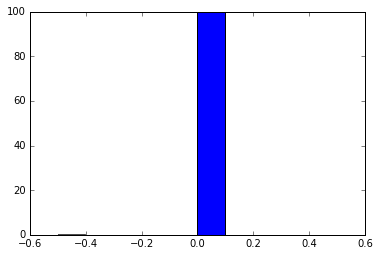

In [40]:
plt.hist(data['gunpz']);
print len([dataPoint for dataPoint in data['gunpz'] if dataPoint != 0]), "out of", len(data['gunpz']), "non-zero elements in gunpz"

100 out of 100 non-zero elements in m


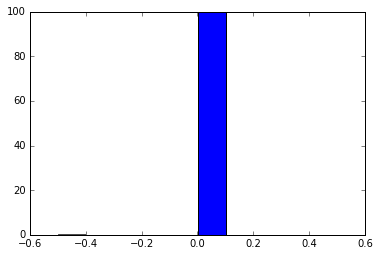

In [48]:
plt.hist(data['m']);
print len([dataPoint for dataPoint in data['m'] if dataPoint != 0]), "out of", len(data['m']), "non-zero elements in m"

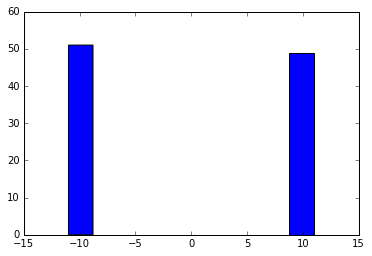

In [60]:
plt.hist(data['pdgID']);

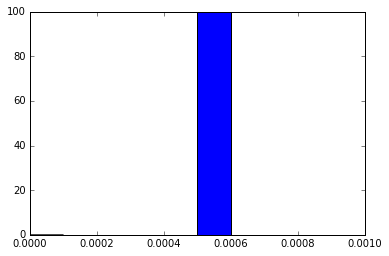

In [57]:
plt.hist(data['m'], range=[0, 0.001]);

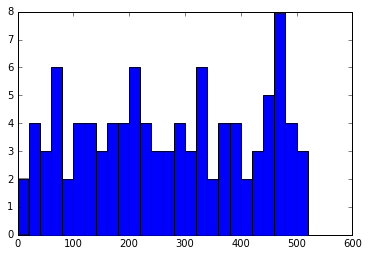

In [53]:
plt.hist(data['gunE'], range=[0,600], bins=30);

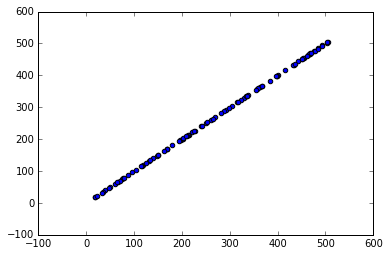

In [56]:
plt.scatter(data['gunE'], data['gunpx']);

## py and pz are 0. Only px varies (which I assume is in the direction of the beam). Gun energy is basically the same as px. All particles in this sample are electrons (or positrons)with 511 keV mass.

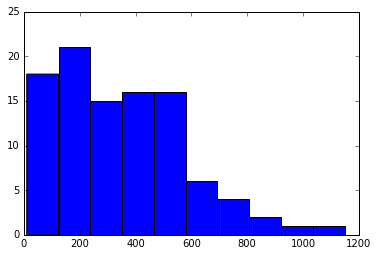

In [64]:
plt.hist(data['nhcalhits']);

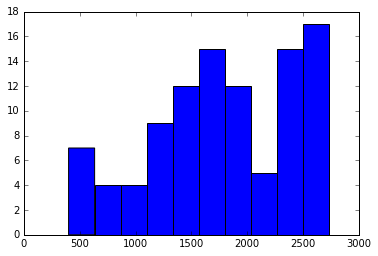

In [65]:
plt.hist(data['necalhits']);

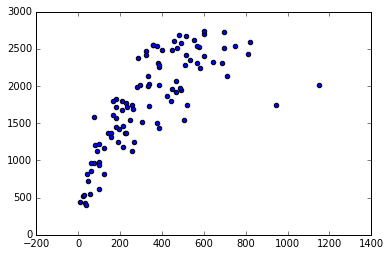

In [72]:
plt.scatter(data['nhcalhits'], data['necalhits']);

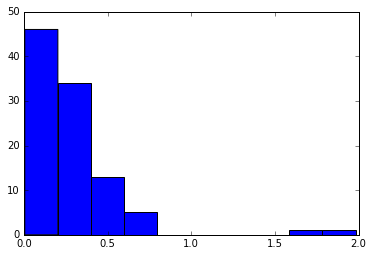

In [67]:
plt.hist(data['hcaltote']);

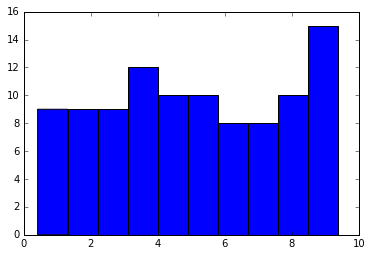

In [68]:
plt.hist(data['ecaltote']);

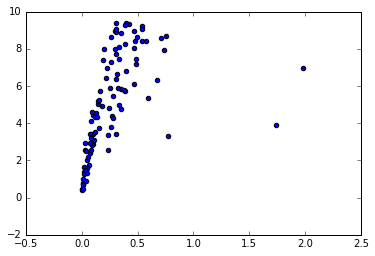

In [73]:
plt.scatter(data['hcaltote'], data['ecaltote']);

## ECAL and HCAL hits and energy are correlated, as expected. Now to look at their relation to gun energy.

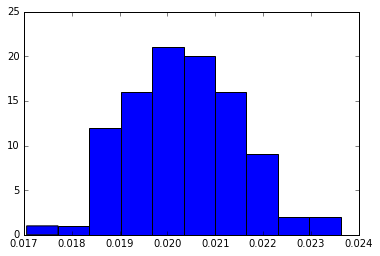

In [78]:
plt.hist([(a+b)/c for a,b,c in zip(data['hcaltote'], data['ecaltote'], data['gunE'])]);

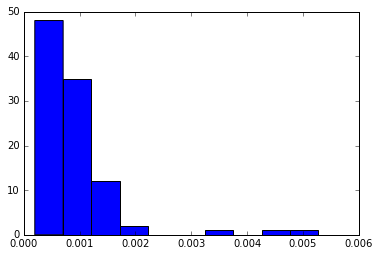

In [80]:
plt.hist([a/c for a,b,c in zip(data['hcaltote'], data['ecaltote'], data['gunE'])]);

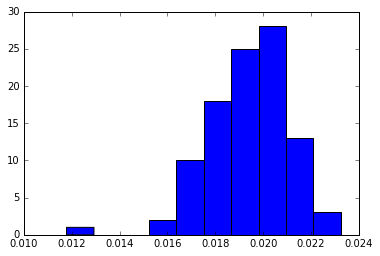

In [81]:
plt.hist([b/c for a,b,c in zip(data['hcaltote'], data['ecaltote'], data['gunE'])]);

## About 2% of the gun energy goes into the HCAL, and less than .1% goes into ECAL.